# Exercises 3: Linear Regression

The following lab-session is adapted from that of Section 3.6 in Introduction to Statistical Learning with R.


We use the Boston data set, which records `medv` (median house value) for 506 census tracts in Boston. We will seek to predict
medv using 12 predictors such as `rm` (average number of rooms per house), `age` (average age of houses), and `lstat` (percent of households with low socioeconomic status).


(A useful reference for working with linear regressions in statsmodels is https://www.statsmodels.org/stable/examples/notebooks/generated/interactions_anova.html)

There are three main ways of fitting a linear regression with Python: 
* The `OLS` method from statsmodels.api
* The `ols` method from statsmodels.formula.api
  This method allows us to specify models ``R-style'' rather than via
  the design matrix (see e.g.\
  \url{https://www.statsmodels.org/dev/example\_formulas.html}).\\

  Note that, in the formula, you can specify that X is a factor as
  `C(X)`. Also note that anything enclosed in ``the identity
  function'' `I()` will be taken literally; for instance, 
  $\texttt{I}(x_1*x_2)$ gives a new variable with the numeric product
  of variables $x_1$ and $x_2$.
* The method `LinearRegression` from `linear_model` in `sklearn`.

You are encouraged to try all three methods. When you read the manual pages, note that outcome Y is referred to as the
endogenous variable and features X as the exogenous variable(s).



In [73]:
# Import relevant packages
import numpy as np
from pandas import read_csv, DataFrame
from math import log, sqrt
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm
## to be able to specify models as Y ~ lstat we need the formula API
from statsmodels.formula.api import ols 

In [74]:
# Load data from csv; change the directory as you need!
# read the csv and store is in a frame named Boston
Boston = read_csv("Boston.csv")
# take the first 5 rows of the csv, used to see if our retrieval was ok
Boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Simple Linear Regression (i.e. with one explanatory variable)

We will start by fitting a simple linear regression model, with `medv` as the response and `lstat`  as the predictor: $medv = \beta_0 + \beta_1 lstat + \epsilon$

First plot the response `medv` against `lstat` and see what the relationship looks like, so that you have an idea what the result may be.

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64 0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: lstat, Length: 506, dtype: float64


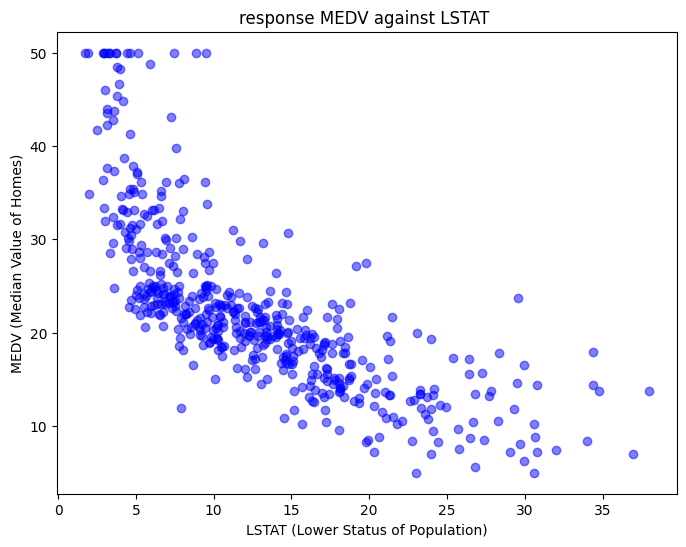

In [75]:
# Your code here
medv = Boston['medv']
lstat = Boston['lstat']
print(medv, lstat)

# What we do now is basically plot on a scatter plot the relation between these two variables
# we see for each fetaure(value) of lstat what is the respective medv value
# from this we immediatly derive a visual intuition 

plt.figure(figsize=(8, 6))
plt.scatter(lstat, medv, color='blue', alpha=0.5)
plt.title('response MEDV against LSTAT ')
plt.xlabel('LSTAT (Lower Status of Population)')
plt.ylabel('MEDV (Median Value of Homes)')
plt.show()

What we infer from the graph is that as the LSTAT increases the medv decreases and viceversa. 
We see some medv values still middle-high even thogh LSTAT is high but they are too few to able
to say that they are effectivetly correlated.

In [76]:
X = Boston['lstat']
print("this is the X without intercept",X)
## Need an intercept in the model, so we add the constant feature 
# the add_constant function is a function from the statsmodels library that adds a column of ones to the dataset X. 
# This new column represents the intercept (constant) term in the regression mode
X = sm.add_constant(X)
print("this is the X with the intercept",X)

# use the OSL Model to get the regression
# remember we want medv = B0 + B1LSTAT + E 
# where X is LSTAT

# the sM.OSL return a big object with all the data about the regression
# this function takes a dependent variable which in our case is medv (outcome we want to predict) 
# this function takes a second parameters which is the matrix X of independent variables which in our case is LSTAT
sm_model = sm.OLS(Boston['medv'], X)

# Up to this point the model is good and has the informations it needs but it still didn't calculate the coefficients
# we gotta fit the model, train him, so that he can calculate the coefficients 
# Here is when the fit function appears and performs the actual regression so calculating the coefficients
# What is does is : it fits the model to the data 
lm1 = sm_model.fit()

# Now the lm1 variables hold ALL the infos about the regression, coefficients, p-values, variance etc..
# we want to extract this importnat information and we do this thanks to the summary function that 
# provides a table version of all the information the linear regression returned
lm1.summary()

this is the X without intercept 0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: lstat, Length: 506, dtype: float64
this is the X with the intercept      const  lstat
0      1.0   4.98
1      1.0   9.14
2      1.0   4.03
3      1.0   2.94
4      1.0   5.33
..     ...    ...
501    1.0   9.67
502    1.0   9.08
503    1.0   5.64
504    1.0   6.48
505    1.0   7.88

[506 rows x 2 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           5.08e-88
Time:                        09:30:04   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# Alternatively specify via the formula API
ols("medv ~ 1 + lstat", Boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           5.08e-88
Time:                        09:30:05   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can also get the estimated parameters directly from the model. A confidence interval for model coefficients is found in the model summary. 

In [78]:
## Coefficients beta:
# This will be the betas of our formula Y = B0 + B..n + E
lm1.params

const    34.553841
lstat    -0.950049
dtype: float64

Standard error of residuals -- the square root of the estimated variance $\sigma^2$

In [79]:
# The standard error of the residuals is the square r

# The residual standard error is used to measure how well a regression model fits a dataset.
# The smaller this value is, the best our regression model fits the dataset 
# A model that has this value relly slow, will have data points really close to the fitted line

sqrt(lm1.mse_resid)

6.215760405398068

In [80]:
## Estimated variance mse_resid is computed as RSS divided by the residual degrees of freedom -> rss = SUM (y-yi^)^2
## (found as "DF residuals" in summary and df_resid in model object, this is the total number of sample 

# HERE WE ARE CALCULATING THE MSE = that is 1/n * sum(y-yi^)^2
# The mean square of the error (MSE) is obtained by dividing the sum of squares of the residual error by the degrees of freedom. 
# The MSE IS THE VARIANCE (s^2) around the fitted regression line.

mse = (lm1.resid**2).sum()/lm1.df_resid
print(mse, "this is the MSE")
stde = sqrt(mse)
print(stde, "this is the standard error of residuals")

38.63567741731436 this is the MSE
6.215760405398068 this is the standard error of residuals


In [81]:
## Yet another way of obtaining the variance 

# The sum of squares due to regression (SSR) or explained sum of squares (ESS) is the sum of the differences between the predicted value and the mean of the dependent variable. 
# In other words, it describes how well our line fits the data.

lm1.ssr/lm1.df_resid

np.float64(38.63567741731436)

##  Predictions, confidence intervals, and prediction intervals

We can get a prediction--the estimated mean value of `medv` for a specific value of `lstat`--for any new datapoint. To get an idea of uncertainty in the model, we can look at 
- a confidence interval for the value of the regression line to indicate how much the line itself would vary if fitted on new data.
- a prediction interval to indicates the range in which we expect the outcome to fall. 

Here we compute the 95% confidence- and prediction intervals (specified as alpha = 0.05 = 1-0.95)

A. Make again a scatterplot of `medv` against `lstat` and draw the regression line on top using get_prediction() to calculate the fitted values (if you just want them for the data that you used for fitting the model, you could also get them directly from the model object as `fittedvalues`). Here is an example predicting on the observations in the Boston data set -- try to replace `X` with a new dataset containing your favourite values of the explanatory variable. 

B. Add two curves to show the upper and lower confidence limits as a function of `lstat`.

C. Add two curves to show the upper and lower prediction limits as well.

Comment on the plot and, in particular, note how the prediction intervals contain the confidence interval for the predicted value.

In [82]:
## Predicting on a new dataset (here just the original one X)
pred1 = lm1.get_prediction(X)
print(pred1, "this are the predictions")
## Results of prediction in a dataframe
pred1_df = pred1.summary_frame(alpha=0.05)
pred1_df.head()

<statsmodels.regression._prediction.PredictionResults object at 0x7f7ad2232140> this are the predictions


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.822595,0.405814,29.025299,30.619891,17.584603,42.060587
1,25.870390,0.308011,25.265246,26.475534,13.643413,38.097367
2,30.725142,0.433488,29.873477,31.576807,18.483488,42.966796
3,31.760696,0.466794,30.843594,32.677798,19.514315,44.007076
4,29.490078,0.395994,28.712077,30.268079,17.253328,41.726828


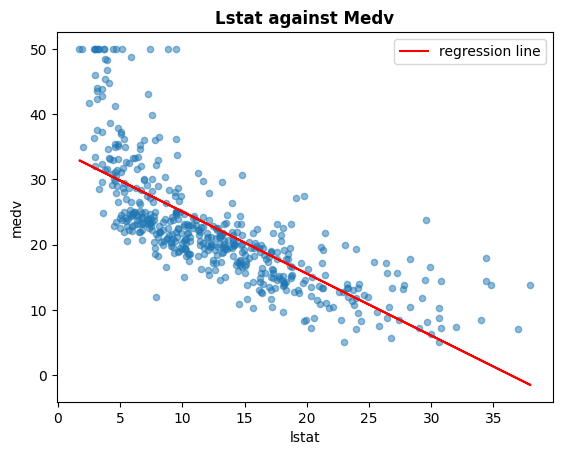

In [83]:
# A. Your code here

line = Boston.plot.scatter('lstat', 'medv', alpha=0.5)
line.plot(X['lstat'], pred1_df['mean'], color='red', label='regression line')
line.set_title('Lstat against Medv', weight="bold")
line.legend()



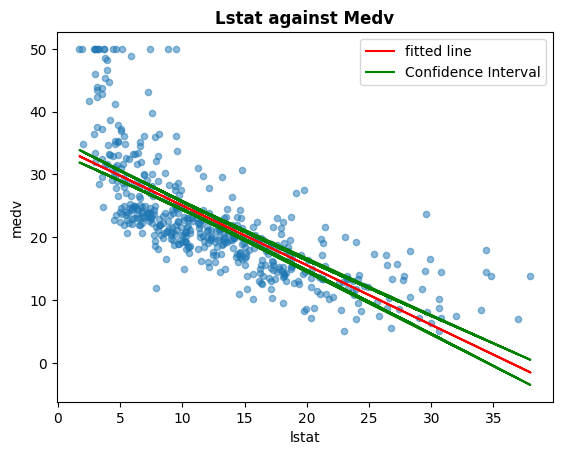

In [84]:
# B. Your code here
confidence_add = Boston.plot.scatter('lstat', 'medv', alpha=0.5)
confidence_add.plot(X['lstat'], pred1_df['mean'], color='red', label='fitted line')
confidence_add.set_title('Lstat against Medv', weight="bold")

# We add two new lines that will be the 95% confidence interval,
# This tells us basically how much the regression line would change as new data set points would come
confidence_add.plot(X['lstat'], pred1_df['mean_ci_lower'], color="green", label= 'Confidence Interval')
confidence_add.plot(X['lstat'], pred1_df['mean_ci_upper'], color="green")

confidence_add.legend()

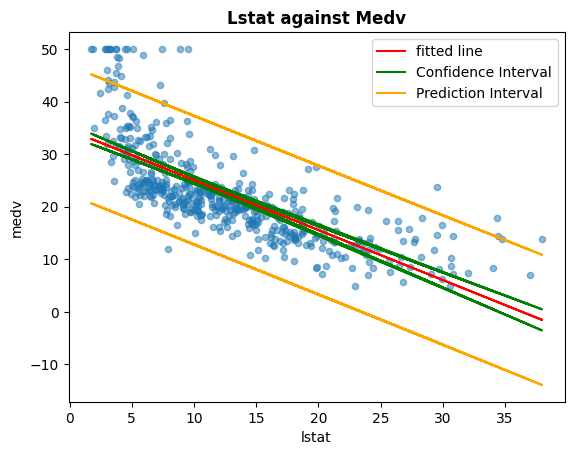

In [85]:
# C. Your code here

ax = Boston.plot.scatter('lstat', 'medv', alpha=0.5)
ax.plot(X['lstat'], pred1_df['mean'], color='red', label='fitted line')
ax.set_title('Lstat against Medv', weight="bold")

ax.plot(X['lstat'], pred1_df['mean_ci_lower'], color="green", label= 'Confidence Interval')
ax.plot(X['lstat'], pred1_df['mean_ci_upper'], color="green")


# This interval is the range where we are 95% sure that our predictions will rely on 
# this is the range where we expect our outcome to fall
ax.plot(X['lstat'], pred1_df['obs_ci_lower'], color="orange", label= 'Prediction Interval')
ax.plot(X['lstat'], pred1_df['obs_ci_upper'], color="orange")

ax.legend()

From the plot we evince that the Prediction interval contains both the regression line and the confidence interval, this is due to the fact that most of the points our dataset are clustered together (all are pretty close to each other except for a very few points). We are then able given the distribution to have a confidence interval, which is how much our regression line will change due to new fitting points that, is very small, which is good.Given this Our prediction interval is able to contain other than the fitting line also the confidence interval, given that it will not change much. To end we can say that our model will be able to ddo good predictions because data il closed together so the predicted points that will 95% surely be in the Prediction Interval, will be close to reality.  

Lamberto Ragnolini

Based on the matrix formula for the parameter estimates, implement a function that takes the estimated parameters and a new feature value x and returns the predicted value $\hat y$. (Try to vectorize it such that you can give
it multiple new input values and get multiple predictions out). Check that you get the same as obtaining the
predicted values from the linear regression directly.

In [86]:
# Your code here
# the formula is y^ = XB^
def matrixPrediction(est_params, new_X):
    return est_params @ new_X

In [87]:
# Now we vectorize this to be able to get multiple results based on multiple predictors
est_params = np.array(lm1.params)
est_params

array([34.55384088, -0.95004935])

In [88]:
new_pred = matrixPrediction(X, est_params)
new_pred

0      29.822595
1      25.870390
2      30.725142
3      31.760696
4      29.490078
         ...    
501    25.366864
502    25.927393
503    29.195563
504    28.397521
505    27.067452
Length: 506, dtype: float64

## Model checking methods

We can obtain relevant quantities either directly from the results of a linear model or from its method get_influence(). Here is an overview.

From the model fit we have
- Raw residuals: resid

From get_influence() we have 
- Studentized residuals: resid_studentized_internal ($\beta$ estimated leaving out observation $i$)
- Externally studentized residuals: resid_studentized_external ($\beta$ and $\sigma^2$ both estimated leaving out observation $i$)
- hatvalues: This is also called leverage and are the diagonal elements $h_{ii}$ of the hatmatrix $X(X^TX)^{-1}X^T$. Obtained as hat_matrix_diag
- Cook's distance: cooks_distance

To get the classical standardised residuals $e_i/\sqrt{\hat\sigma^2(1-h_{ii})}$ we seem to need to do the scaling ourselves. 

In [89]:
infl = lm1.get_influence()
## Obtaining standardised residuals
# WHY DO WE STANDARDIZE RESIDUALS?? we standardize to be able to compare, we need a measure that is similar so that we can have a comparison 

# follow the formula for scaling that we have to do by ourselves
SE_of_residuals = np.sqrt(lm1.mse_resid*(1-infl.hat_matrix_diag))
stdres = np.divide(lm1.resid, SE_of_residuals)

### Is the assumption of Gaussian errors reasonable? 
Compare standardised residuals to a standard normal distribution

Plot the standardised residuals ordered from smallest to highest against the quantiles from a standard normal distribution. To get the latter, for N datapoints (and thus N residuals) in your data you compute the standard normal quantile for the N probabilities (1/(N+1), ..., N/(N+1)). It is good practice to make the plot square. Statsmodels also has a built-in function to make this quantile-quantile plot.

What do you see?

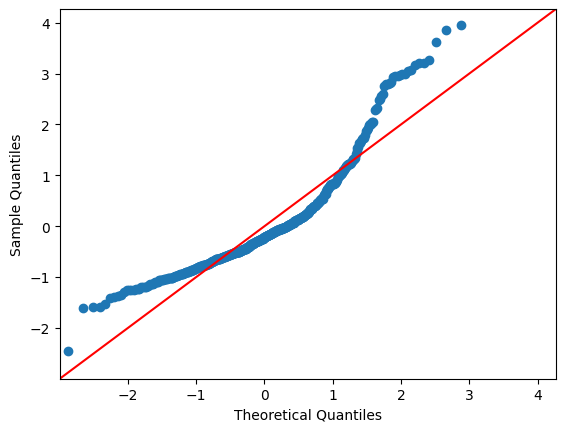

In [90]:
sm.qqplot(stdres, line='45'); ## Compare to standard normal distribution

# FROM THE GRAPH WE SEE THAT IT IS NOT SUPER GOOD, IT DOESN NOT FOLLOW THE REGRESSION LINE

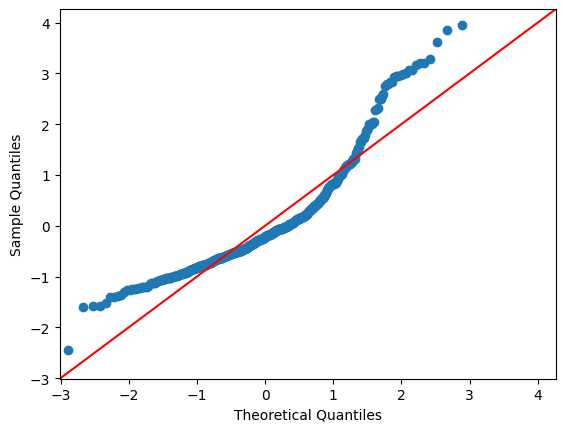

In [91]:
## We can also use the studentized residuals for this kind of check. 
## With this much data, it will not make much of a difference. 
## They should be compared to a t-distribution with n-p-1 degrees of freedom (df_resid)]

# studentized is when you remove a point and plot again and then predict and watch the difference (residual), if it is huge then the  point is very influential otherwise not
import scipy.stats as stats
sm.qqplot(lm1.get_influence().resid_studentized_internal, # observed residuals 
          stats.t, distargs=(lm1.df_resid,), #compare with quantiles of t-distribution 
          line = '45'  #reference line
         );

### Is there any systematic trend in the residuals?

To inspect this, make the following two types of plots:
1. The raw residuals $y_i- \hat y_i$ against the explanatory variable `lstat`.
2. The raw residuals against the fitted values $\hat y_i$. 

The first type of plot is relatively straightforward in revealing whether variation is small or large for certain values of the explanatory variables. It can require a bit of practice to interpret systematic trends in the second plot, but think of it as inspecting variation around the regression surface at different heights of the surface.

In the plots, try to assess whether
- there are any curvatures or other trends; the points should be nicely scattered around a horizontal line in 0.
- there is evidence of non-homogeneous variance

Text(0.5, 1.0, 'Raw resid vs lstat')

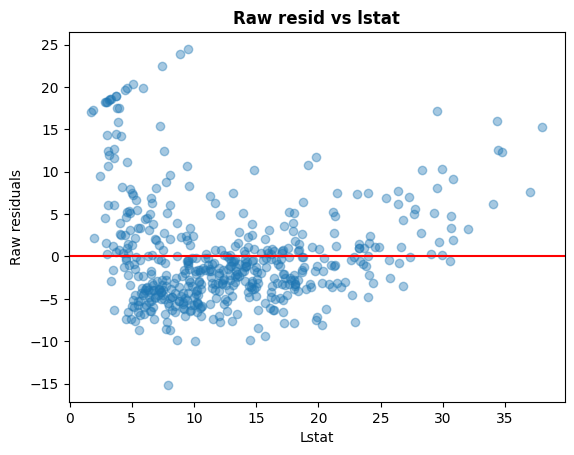

In [92]:
# 1. raw residulas against lstat

fig,ax = plt.subplots() #just creates the graph and the axes 

# it plots on the X axis the lstat values 
# it plots on y axes the residuals of our linear regression -> Residuals are the differences between the observed and predicted values
# alpha=0.4 controls the transparency of the point -> lower values = more transparent point
ax.scatter(X['lstat'],lm1.resid,alpha=0.4) 
plt.axhline(y=0, color='r', linestyle='-')

ax.set_ylabel('Raw residuals')
ax.set_xlabel('Lstat')
ax.set_title('Raw resid vs lstat', weight='bold')

This plot basically tells us how much for each value of lstat used as sample we were able to achieve precision in the real results. We plot against the difference between the real value and the predicted one.
On the y axis there is the difference between the real and the predicted and on the x axis there is the value of lstat used.That is why we plot a line at 0 to have a visula understanding of the overall spreading

Lamberto Ragnolini

Text(0.5, 1.0, 'Raw resid vs fitted values')

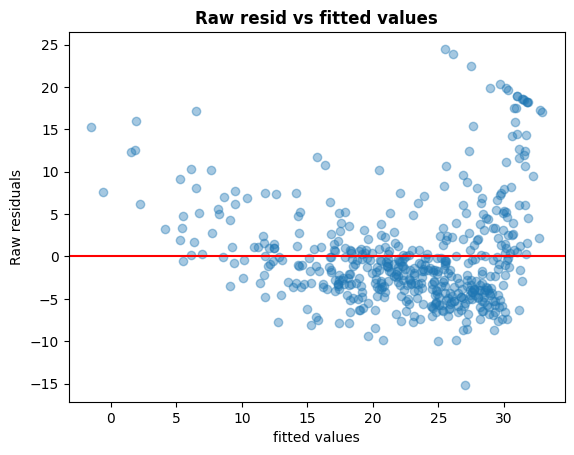

In [93]:
# 2. raw residuals against fitted values yi^

fig,ax = plt.subplots() #just creates the graph and the axes 

# it plots on the X axis the yi^ values (fitted values) this are the predicted values
# it plots on y axes the residuals of our linear regression -> Residuals are the differences between the observed and predicted values
# alpha=0.4 controls the transparency of the point -> lower values = more transparent point
ax.scatter(lm1.fittedvalues,lm1.resid,alpha=0.4) 
plt.axhline(y=0, color='r', linestyle='-')

ax.set_ylabel('Raw residuals')
ax.set_xlabel('fitted values')
ax.set_title('Raw resid vs fitted values', weight='bold')

The plot sees the raws residuals against the predicted values, this means that we can see how much did our regression messed up on the y-axis for every sample. The graph basically has on the X-axis the predicted values of the linear regression and on the y-axis the amount of units from which that result is far away from th real one. That is why we plot a line at 0 to have a visula understanding of the overall spreading

Lamberto Ragnolini

### Influential observations

You can think of leverage (diagonal elements of the hat matrix) as flags for *potentially* influential observations. Leverages are always bigger than 1/n, and they sum to the number of variables in the model, $p$. If the observation **also has a high studentized residual** --- the residual obtained when using the regression fitted *without the observation* $(x_i, y_i)$ --- then it is likely to act like a magnet on the regression surface. Cook's distance is a measure that in effect flags observation with high leverage and large residuals. 

Taking the observations in any order (for instance row index), make three plots on top of each other: 
1. Leverage (hatvalues) against index
2. Studentized residuals against index
3. Cooks distance against index

Text(0.5, 1.0, 'Leverage values vs index')

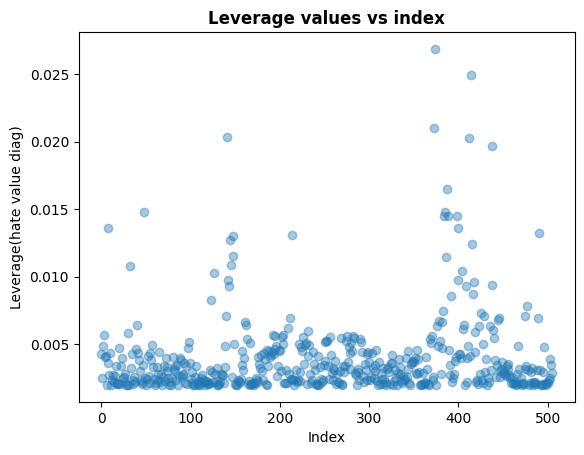

In [94]:
# 1. Leverage (hatvalues) against index

fig,ax = plt.subplots() #just creates the graph and the axes 

# recall that from method get_influenece() we have : 
    # Studentized residuals: resid_studentized_internal ($\beta$ estimated leaving out observation $i$)
    # - Externally studentized residuals: resid_studentized_external ($\beta$ and $\sigma^2$ both estimated leaving out observation $i$)
    # - hatvalues: This is also called leverage and are the diagonal elements $h_{ii}$ of the hatmatrix $X(X^TX)^{-1}X^T$. Obtained as hat_matrix_diag
    # - Cook's distance: cooks_distance
ax.scatter(X.index,infl.hat_matrix_diag,alpha=0.4) 

ax.set_ylabel('Leverage(hate value diag)')
ax.set_xlabel('Index')
ax.set_title('Leverage values vs index', weight='bold')



Text(0.5, 1.0, 'studentized residuals vs index')

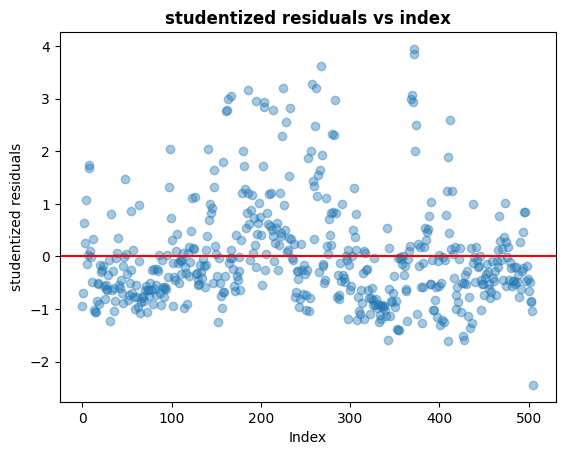

In [95]:
# 2. Studentized residual against index

fig,ax = plt.subplots() #just creates the graph and the axes 

# recall that from method get_influenece() we have : 
    # Studentized residuals: resid_studentized_internal ($\beta$ estimated leaving out observation $i$)

ax.scatter(X.index,infl.resid_studentized,alpha=0.4) 
plt.axhline(y=0, color='r', linestyle='-')

ax.set_ylabel('studentized residuals')
ax.set_xlabel('Index')
ax.set_title('studentized residuals vs index', weight='bold')

Text(0.5, 1.0, 'Cooks distance vs Index')

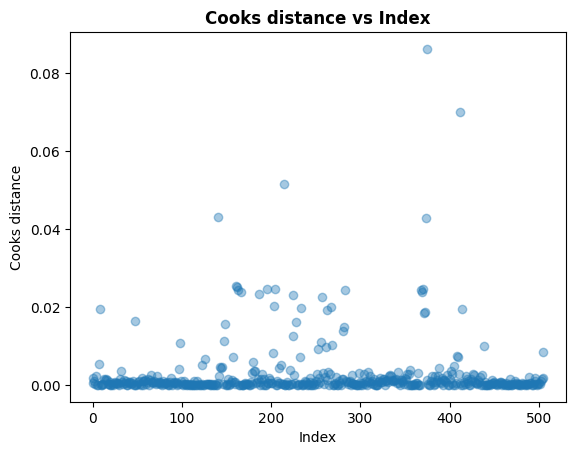

In [96]:
#  3. Cooks Distance against index

fig, ax = plt.subplots()

ax.scatter(X.index, infl.cooks_distance[0], alpha=0.4)

ax.set_ylabel('Cooks distance')
ax.set_xlabel('Index')
ax.set_title('Cooks distance vs Index', weight='bold')


## Multiple Linear Regression (i.e. with multiple explanatory variables)

Now we make more complex models. 

Fit a model `lm2` that includes both `age` and `lstat`.

In [97]:
# Your code here
# ordinary least square is ols(formula, data)   
# in the formula we first write the dependent variable in our case medv and then we write our indipendent variables in our case age and lstat
# what we are tryina do here is then tryin to predict medv with just age and lstat
#  ~ means "regressed on " so -> predict medv regressen on lstat,age

# fit function simply fits the model to the data, performs the actual regression
lm2 = ols("medv ~ lstat + age", Boston).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           2.98e-88
Time:                        09:30:07   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fit then model `lm3` in which they enter also as a product (interaction). Note that if you include `lstat*age` using the formula API, then `lstat` and `age` are automatically added to the model -- a nice thing about formula APIs is that we only need to specify these highest order interactions.

In [98]:
# Your code here
# With the api we can simply fit the interaction by multiplying them in the formula
lm3 = ols("medv ~ lstat + age + lstat*age", Boston).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           4.86e-88
Time:                        09:30:07   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Non-linear transformations of the explanatory variables

We now perform a regression of `medv` onto `lstat` and `lstat` squared. 

Given a predictor $X$, we can create a predictor $X^2$ using
 `I(X**2)` in the formula API. The function `I()` is needed to protect the math formula inside.
 
When building models in practice, consider shifting your explanatory variables so that the intercept has a more interpretable meaning. For example, age=0 is rarely interesting, whereas age=25 or age="median value of the observed in our study" might very well be. Typically we would center them around the mean, the median or a value with some nice interpretation. It can also help on numerical stability, especially when fitting polynomials where values get more extreme.

In [99]:
lm4 = ols("medv ~ lstat + I(lstat**2)", Boston).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.56e-112
Time:                        09:30:07   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
lstat            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(lstat ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interactions
Create a categorical feature by splitting `age` into three groups using cutpoints of your own choice. 

(a) Fit a model where the lines capturing the relationship between `medv` and `lstat` are parallel for the three
age groups (only intercept changes)

(b) Fit a model where the lines have different intercept and slope in each of the three age groups (both intercept
and slope is unique to the group)

(c) Visualize the fitted lines by predicting on new data in a specific group and on a range of `lstat`
values (possibly much finer range than the values in the data). Plot the fitted values against the range of
`lstat` values.

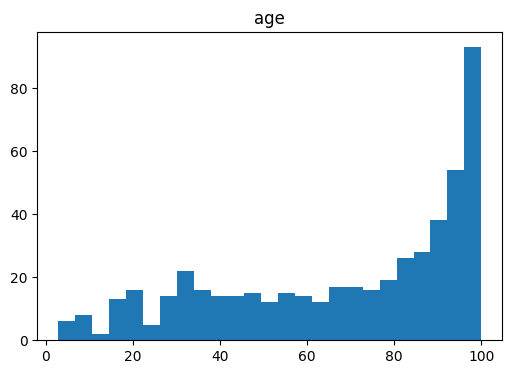

In [100]:
# we can visualize the age column by plotting it on a histogram
ax = Boston.hist(column='age', bins= 25, grid=False, figsize =(6,4))

In [101]:
## This is an initial thought BUT we would like to split the data based on the age not just on how it is ordered in the dataset

# We have to split the age into three so what we do is:

# 1. Look at the age column in the dataset
Boston['age']

# 2. retrieve length of it 
total_len = len(Boston['age'])

# 3. make the split even
split = total_len // 3

# 2 make a division based on the number of feature (in our case total = 506)
one = Boston['age'][:split] #from 0 to 1/3
two = Boston['age'][split: split*2] #1/3 to 2/3
three = Boston['age'][split*2:] #last third

print(one,two,three)

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
163    93.9
164    91.8
165    93.0
166    96.2
167    79.2
Name: age, Length: 168, dtype: float64 168    96.1
169    95.2
170    94.6
171    97.3
172    88.5
       ... 
331    28.4
332    23.3
333    38.1
334    38.5
335    34.5
Name: age, Length: 168, dtype: float64 336    46.3
337    59.6
338    37.3
339    45.4
340    58.5
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: age, Length: 170, dtype: float64


In [102]:
# Here is how we can decide to split the data 

# we decide :
# first group -> age <= 30
# second group -> 30 < age <= 60
# third group -> age > 60

# pandas give us a great function to oo this that is the pandas.cut function

# first define cutpoints
cutpoints = [0,30,60,np.inf] 

# given that it will be divided into beans lets label the beans
labels = ['young', 'middle age', 'old']

# now use the cut function to create the categorical variable
Boston['age_group'] = pd.cut(Boston['age'], bins=cutpoints, labels=labels)

# visualize the result now
Boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,age_group
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,old
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,old
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,old
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,middle age
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,middle age


We can see that we were able to create a categorical variable that classifies the individual as either young, middle age or old based on its age. Given that we are working woth a dataset and we would like to be more efficient and be able to work with our feature, the naming of the variable with natural language is not a perfect choice so we would like to replace the naming with maybe numbers.
i.e :
young = 1
middle age = 2
old = 3

Lamberto Ragnolini

In [103]:
# rename the age_group categorical variable

mapping = {
    'young' : 1,
    "middle age" : 2,
    "old" : 3 
}

Boston['age_group'] = Boston['age_group'].map(mapping)

Boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,age_group
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,3
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,3
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,3
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,2
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,2


In [104]:
# a.

# the C(..) is used to tell to the regression that that variable is categorical
# normally the regression is expecting continuous variables
lma = ols("medv ~ lstat + C(age_group)", Boston).fit()
lma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     204.2
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           1.51e-86
Time:                        09:30:07   Log-Likelihood:                -1638.4
No. Observations:                 506   AIC:                             3285.
Df Residuals:                     502   BIC:                             3302.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            33.9496      0.828     41.021      0.000      32.324      35.576
C(age_group)[T.2]     0.4577      0.961      0.476      0.634      -1.431       2.347
C(age_group)[T.3]     1.9184      0.937      2.047      0.041       0.077       3.759
lstat                -1.0071      0.045    -22.379      0.000      -1.096      -0.919
==============================================================================
Omnibus:                      127.607   Durbin-Watson:                   0.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.069
Skew:                           1.388   Prob(JB):                     4.10e-56
Kurtosis:                       5.097   Cond. No.                         74.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
# b

# to model different slopes and iterceptions we can use an interaction term creted as lstat * age_group
# this will give us classification of the lstat for the three different age_groups 

lmb = ols('medv ~ lstat * C(age_group)', Boston).fit() 
lmb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     128.9
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           1.61e-87
Time:                        09:30:07   Log-Likelihood:                -1630.8
No. Observations:                 506   AIC:                             3274.
Df Residuals:                     500   BIC:                             3299.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  32.5136      1.500     21.681      0.000      29.567      35.460
C(age_group)[T.2]           7.1340      2.141      3.333      0.001       2.928      11.340
C(age_group)[T.3]           2.7787      1.703      1.632      0.103      -0.566       6.124
lstat                      -0.7869      0.198     -3.976      0.000      -1.176      -0.398
lstat:C(age_group)[T.2]    -0.8298      0.258     -3.216      0.001      -1.337      -0.323
lstat:C(age_group)[T.3]    -0.1829      0.204     -0.898      0.369      -0.583       0.217
==============================================================================
Omnibus:                      120.839   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.373
Skew:                           1.330   Prob(JB):                     1.28e-51
Kurtosis:                       5.009   Cond. No.                         204.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

this is how the new dataframe looks like for the three different groups
      lstat  age_group       pred
0  1.730000        3.0  33.614591
1  2.469592        3.0  32.897368
this is how the new dataframe looks like for the three different groups
      lstat  age_group       pred
0  1.730000        2.0  36.850684
1  2.469592        2.0  35.654974
this is how the new dataframe looks like for the three different groups
      lstat  age_group       pred
0  1.730000        1.0  31.152286
1  2.469592        1.0  30.570305


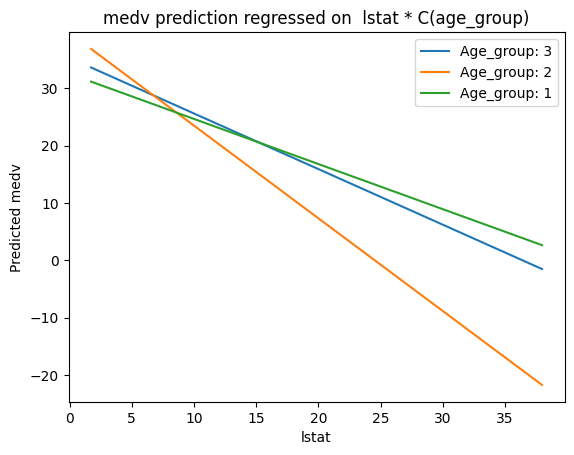

In [106]:
# C

# Now we wanna visualine the lines that we fitted 
# we will do this by predicting on new data and in a much smaller range of lstat

# what happens here is, we retrieve the smallest value from the lstat columns,
# we retreieve also the max value from the lstat column

# np.linspace(start, stop, num) this is the function that we use to generate an array ov evenly spaced values
# the last value which in our case is 50 specified how many values we want to generate
# so what we are doing here is we are trying to generate an array of 50 evenly spaced values between lstas.min and lstat.max
# the purpose of this is to create prediction, by doing this we can create a smooth curve for visualizations
# NOTE: the generated values ARE NOT PICKED by the lstat column!! they are simply values in the given range
range = np.linspace(Boston['lstat'].min(), Boston['lstat'].max(), 50)

# we wanna plot now against lstat features
plt.figure()

# we iterate over groups (1,2,3), in our case Boston['age_group'].unique() will return an array = [1,2,3] 
for group in Boston['age_group'].unique():
    # this loop will create plots specific for each group
    # creates a new dataframe for each interaction of the loop
    df = pd.DataFrame({
        'lstat': range, #assign range array to column lstat of the new frame
        'age_group': np.ones(50) * group # we have to have the same number of features in this column so we create an array containing the group number of the same length of lstat
    })
    df['pred'] = lmb.predict(df) # here we create preditions using a fitted model already created before, calculates the predicted values based on new lstat and age_group in the new df
    print("this is how the new dataframe looks like for the three different groups")
    print(df.head(2))

    # now we plot the new predictions against real lstat
    plt.plot(df['lstat'],df['pred'], label = f'Age_group: {group}')

plt.xlabel('lstat')
plt.ylabel('Predicted medv')
plt.title("medv prediction regressed on  lstat * C(age_group)")
plt.legend()
plt.show()


this is how the new dataframe looks like for the three different groups
      lstat  age_group       pred
0  1.730000        3.0  34.125693
1  2.469592        3.0  33.380828
this is how the new dataframe looks like for the three different groups
      lstat  age_group       pred
0  1.730000        2.0  32.664990
1  2.469592        2.0  31.920125
this is how the new dataframe looks like for the three different groups
      lstat  age_group       pred
0  1.730000        1.0  32.207279
1  2.469592        1.0  31.462414


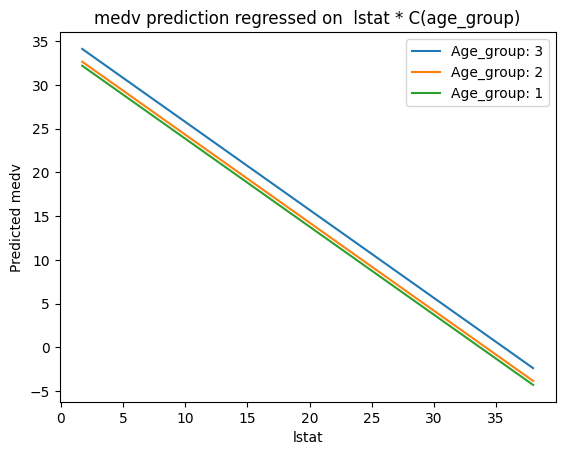

In [107]:
# DO the same but with lma now

range = np.linspace(Boston['lstat'].min(), Boston['lstat'].max(), 50)

# we wanna plot now against lstat features
plt.figure()

# we iterate over groups (1,2,3), in our case Boston['age_group'].unique() will return an array = [1,2,3] 
for group in Boston['age_group'].unique():
    # this loop will create plots specific for each group
    # creates a new dataframe for each interaction of the loop
    df = pd.DataFrame({
        'lstat': range, #assign range array to column lstat of the new frame
        'age_group': np.ones(50) * group # we have to have the same number of features in this column so we create an array containing the group number of the same length of lstat
    })
    df['pred'] = lma.predict(df) # here we create preditions using a fitted model already created before, calculates the predicted values based on new lstat and age_group in the new df
    print("this is how the new dataframe looks like for the three different groups")
    print(df.head(2))

    # now we plot the new predictions against real lstat
    plt.plot(df['lstat'],df['pred'], label = f'Age_group: {group}')

plt.xlabel('lstat')
plt.ylabel('Predicted medv')
plt.title("medv prediction regressed on  lstat * C(age_group)")
plt.legend()
plt.show()

## Comparing two nested models against each other

Consider the two models `lm1` and `lm4` above. The model `lm1` is nested into `lm4`, since it corresponds to setting the coefficient for the squared term to zero. We here discuss three possible ways of comparing the two models, but note that there are many more (see the book for details).

### Method 1: A t-test for whether a specific coefficient is zero ($\beta_j = 0$)

We can see from the summary of model lm4 that the squared term is highly significant. 

### Method 2: An F-test for whether several coefficients are zero 

The F-test based on sums of squares is much more general, in that it allows us to perform a single test addressing whether several coefficients could be zero. This could be because you want to remove several explanatory variables, or because you want to remove a single categorical variable with several groups. Even if we want to test just one coefficient, the F-test is preferable to the t-test. 

In [115]:
# check for p-value P >|t|, this is the suggestion to see the significance

# If the p-value is less than a significance level (commonly 0.05), 
# it indicates that the squared term is statistically significant,
# meaning it has a meaningful effect on the dependent variable (medv in this case).
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.56e-112
Time:                        09:31:28   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
lstat            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(lstat ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
## output is (F-statistic, p-value of the test, degrees of freedom)
## Here we have removed just one parameter, so the degrees of freedom is 1.
lm4.compare_f_test(lm1)

(np.float64(135.19982210087164),
 np.float64(7.630115993367343e-28),
 np.float64(1.0))

In [110]:
## Using formula (3.24) in ISLwR
difference_in_RSS = lm1.ssr - lm4.ssr
drop_in_parameters = lm1.df_resid - lm4.df_resid
residual_standard_error = lm4.mse_resid

(difference_in_RSS/drop_in_parameters)/residual_standard_error

np.float64(135.19982210087164)

The model summary always displays the F-test for removing *all* features of the model, i.e. that *all* coefficients are zero. The test simply compares the model to the "empty model" with no features and only an intercept.

In [111]:
lm4.mse_model/lm4.mse_resid 

np.float64(448.5050879502775)

### Method 3: Comparing by an information criterion

We can also compare models without using tests but rather some kind of "score" -- an information criterion -- such as AIC or BIC. For this comparison, **the models do not have to be nested**. 

Lower AIC is better, so we conclude also from this comparison that the model with a square term is preferred.

In [112]:
(lm4.aic, lm1.aic)

(np.float64(3168.5159568137046), np.float64(3286.974956900157))

Consider the following models: 

$Y \sim 1 + I(1/X)$  (possibly adding X also?)

$Y \sim 1 + X + I(X^2)$

Which model is better? Explain whether you would use F-test or AIC for this.

In [117]:
# What a best way than doing a regression to be able to anwer this 
lm5 = ols(" medv ~ I(1/lstat)", Boston).fit()
lm6 = ols(" medv ~ lstat + I(1/lstat)", Boston).fit()
# the lm4 is already as -> lm4 (medv ~ lstat + I(lstat**2) )

In [118]:
# Now we compare the models using AIC and choose the one with the lower AIC
(lm4.aic, lm5.aic, lm6.aic )

(np.float64(3168.5159568137046),
 np.float64(3173.732543313186),
 np.float64(3123.397634090959))

The one with lower AIC is definetly the lm6 one so now we we can choose it and we can see its adjusted  R-squared

Lamberto Ragnolini

In [121]:
print("Adjusted R-squared for lm6:", lm6.rsquared_adj)
print("Adjusted R-squared for lm5:", lm5.rsquared_adj)
print("Adjusted R-squared for lm5:", lm4.rsquared_adj)

Adjusted R-squared for lm6: 0.6700595187045367
Adjusted R-squared for lm5: 0.634832973827951
Adjusted R-squared for lm5: 0.6392883361185863


If lm6.rsquared_adj is significantly higher than the others, it suggests that the additional predictors in Model 6 provide a better fit for the data compared to the other models. This is our case

Lamberto Ragnolini

## Can you make a model that fits well?

Try using the techniques for model checking and testing to guide you towards a well-fitting model. 